In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [2]:
#import dataset/ Service vs Satisfaction
df = pd.read_excel("V:\Data & Analytics\Sandbox\Gage\Apprenticeship\Portfolio\Project 3\Satisfaction vs Overall Service.xlsx")
df = df.rename(columns = {'Guest Love':'Overall_Service', 'Percentage 8-10':'Satisfaction'})


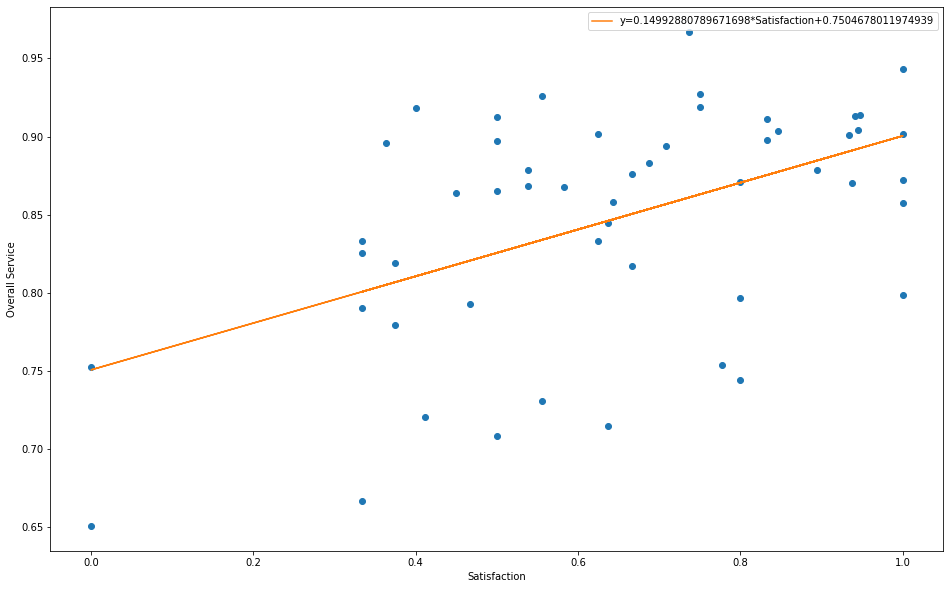

In [3]:
plt.figure(figsize=(16,10))
plt.plot(df.Satisfaction, df.Overall_Service, 'o')
plt.xlabel('Satisfaction')
plt.ylabel('Overall Service')
m, c =np.polyfit(df.Satisfaction, df.Overall_Service, 1)
a = str(m)
b = str(c)

plt.plot(df.Satisfaction,m*df.Satisfaction+c, label='y='+a+'*Satisfaction+'+b)
plt.legend()



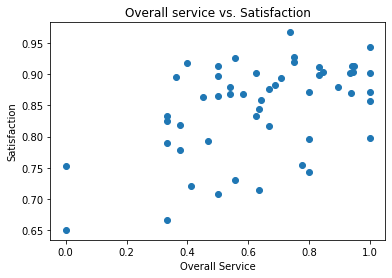

In [4]:
plt.scatter(df.Satisfaction,df.Overall_Service)
plt.title('Overall service vs. Satisfaction')
plt.xlabel('Overall Service')
plt.ylabel('Satisfaction')
plt.show()

<AxesSubplot:>

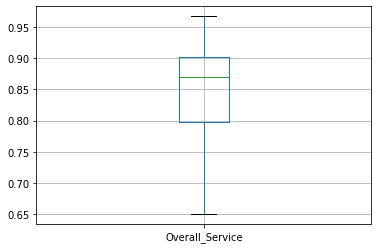

In [5]:
#Any Outliers identified by a small dot on the box plot
df.boxplot(column=['Overall_Service'])

In [6]:
#Response variable/Independent variable is service affected by satisfaction?
y = df['Overall_Service']

x = df['Satisfaction']

#add a constant y = mx + c
x = sm.add_constant(x)

#fit model y=mx+c
model = sm.OLS(y, x).fit()

#view summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Overall_Service   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     16.70
Date:                Fri, 10 Jun 2022   Prob (F-statistic):           0.000158
Time:                        11:52:44   Log-Likelihood:                 69.485
No. Observations:                  52   AIC:                            -135.0
Df Residuals:                      50   BIC:                            -131.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7505      0.025     29.779   

eval_env: 1


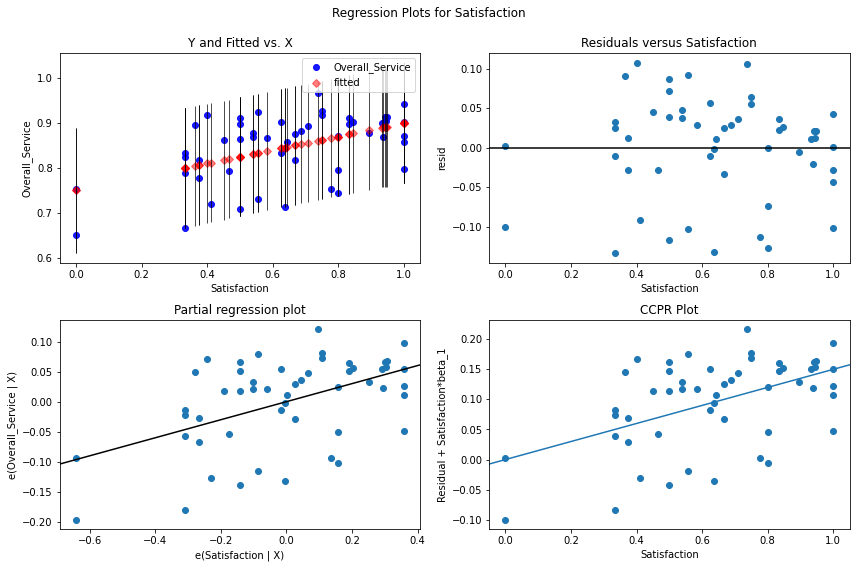

In [7]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plot
fig = sm.graphics.plot_regress_exog(model, 'Satisfaction', fig=fig)

In [8]:
#Service vs Participation
df = pd.read_excel("V:\Data & Analytics\Sandbox\Gage\Apprenticeship\Portfolio\Project 3\Participation vs Overall Service.xlsx")
df = df.rename(columns = {'Guest Love':'Overall_Service'})


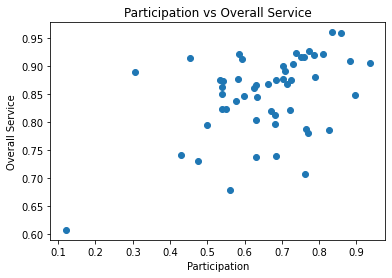

In [9]:
plt.title('Participation vs Overall Service')
plt.xlabel('Participation')
plt.ylabel('Overall Service')
plt.scatter(df.Participation, df.Overall_Service)

<AxesSubplot:>

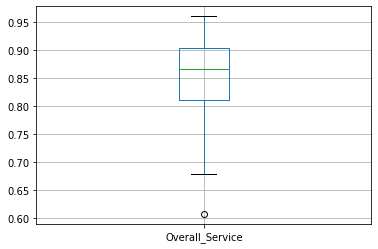

In [10]:
#Any Outliers identified by a small dot on the box plot
df.boxplot(column=['Overall_Service'])

In [11]:
df_clean = df.drop(41)

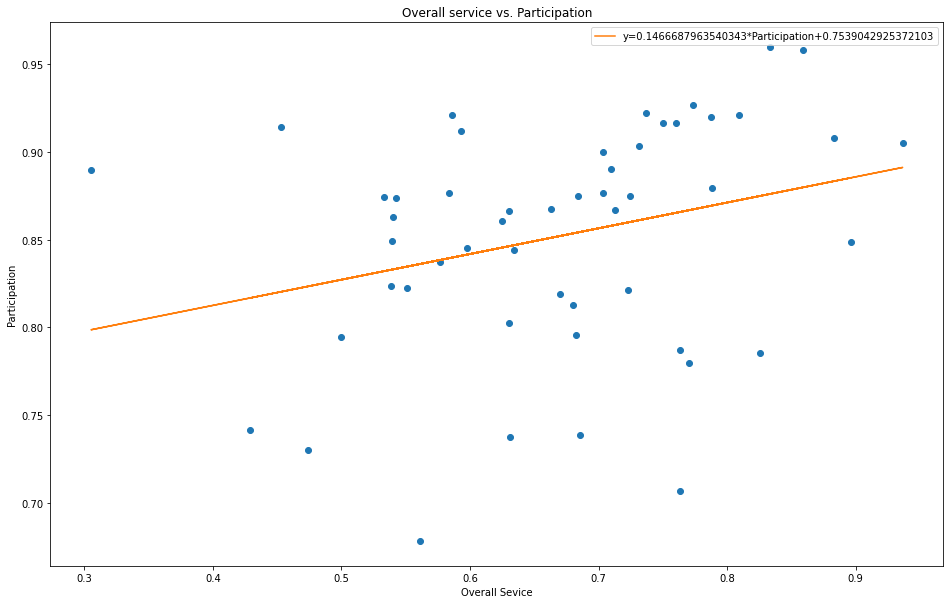

In [12]:
plt.figure(figsize=(16,10))
plt.title('Overall service vs. Participation')
plt.xlabel('Overall Sevice')
plt.ylabel('Participation')

plt.plot(df_clean.Participation, df_clean.Overall_Service, 'o')
m, c =np.polyfit(df_clean.Participation, df_clean.Overall_Service, 1)
a = str(m)
b = str(c)

plt.plot(df_clean.Participation,m*df_clean.Participation+c, label='y='+a+'*Participation+'+b)
plt.legend()


In [13]:
#Response variable/Independent variable is service affected by satisfaction?
y = df_clean['Overall_Service']

x = df_clean['Participation']

#add a constant y = mx + c
x = sm.add_constant(x)

#fit model y=mx+c
model = sm.OLS(y, x).fit()

#view summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Overall_Service   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.473
Date:                Fri, 10 Jun 2022   Prob (F-statistic):             0.0395
Time:                        11:52:45   Log-Likelihood:                 69.362
No. Observations:                  51   AIC:                            -134.7
Df Residuals:                      49   BIC:                            -130.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7539      0.047     15.986

eval_env: 1


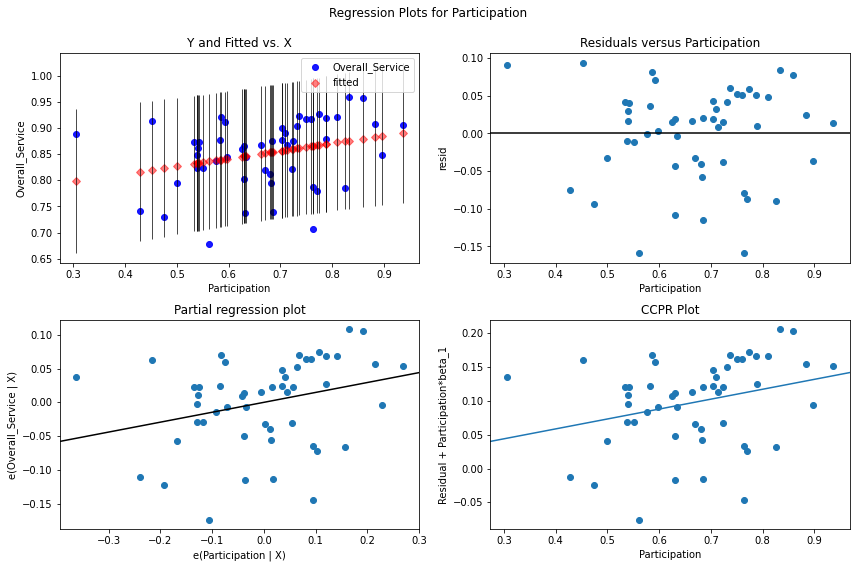

In [14]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce residual plot
fig = sm.graphics.plot_regress_exog(model, 'Participation', fig=fig)


In [15]:
look_up = pd.read_excel("V:\Data & Analytics\Generic Data sources\Hotel_Lookup.xlsx", sheet_name='General')
look_up
com = look_up[["NICKNAME", "COM"]]

In [16]:
data = pd.merge(df_clean, com, on = "NICKNAME", how = "inner")
data

,NICKNAME,Overall_Service,Participation,COM
0,Bath,0.737705,0.631068,Emma Barham
1,Bedford,0.890110,0.709302,Joanna Obidzinska-Bushby
2,Bicester,0.848485,0.896552,Emma Barham
3,Bradford,0.845528,0.597701,David Drummond
4,Bristol,0.874251,0.533333,Emma Barham
5,Bristol City,0.837500,0.576471,Emma Barham
6,Cambridge,0.785714,0.825581,Joanna Obidzinska-Bushby
7,Chingford,0.678161,0.561224,Suzannah Richardson
8,Dartford,0.822785,0.551020,Mark Calpin
9,Derby,0.900000,0.703704,Darren Spencer Phillips


In [17]:
Service = data.groupby("COM")["Overall_Service"].mean()
Participation = data.groupby("COM")["Participation"].mean()


In [18]:
data_2 = pd.merge(Service, Participation, on = "COM", how = "inner")

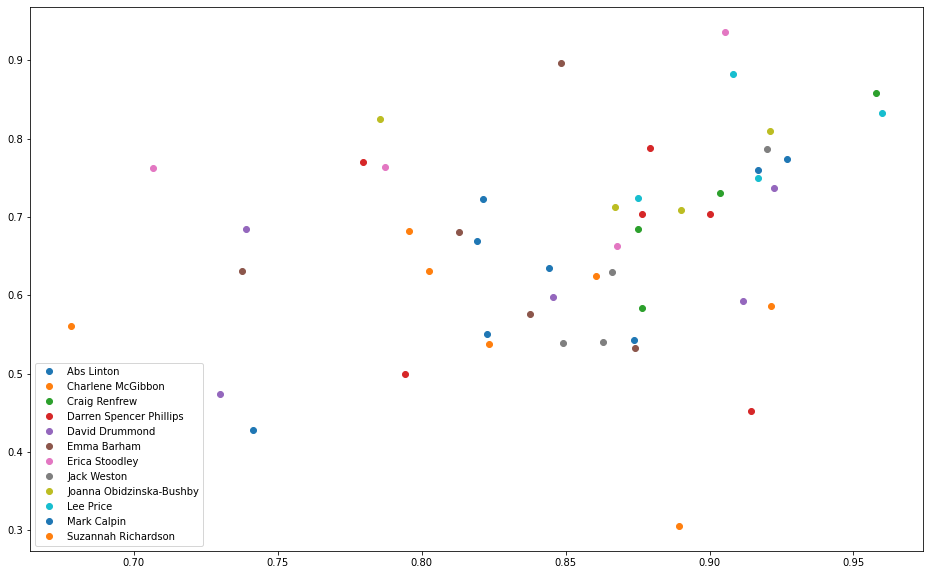

In [19]:
groups = data.groupby('COM')

plt.figure(figsize= (16,10))

for name, group in groups:
    plt.plot(group.Overall_Service, group.Participation, marker = 'o', linestyle = '', label=name)

plt.legend()


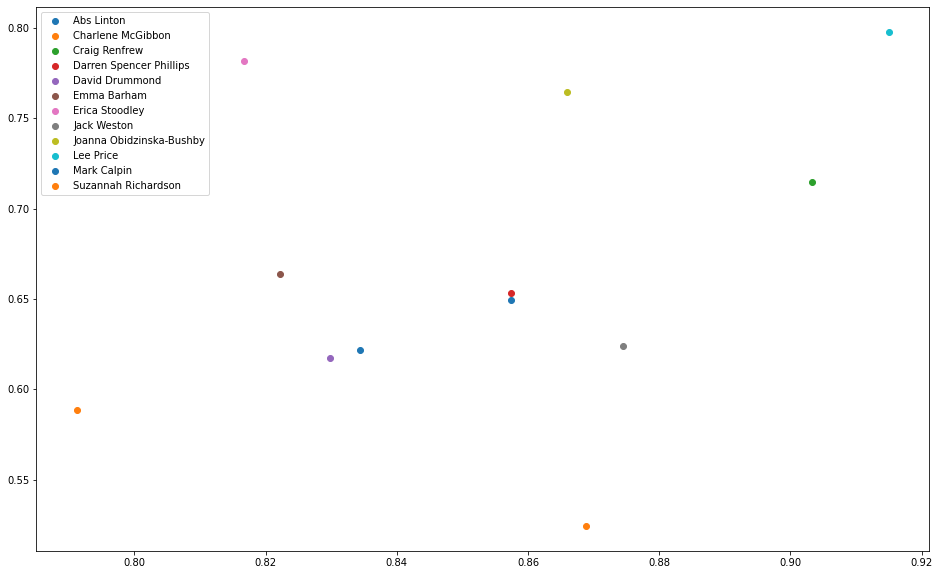

In [20]:
groups = data_2.groupby('COM')

plt.figure(figsize= (16,10))

for name, group in groups:
    plt.plot(group.Overall_Service, group.Participation, marker = 'o', linestyle = '', label=name)

plt.legend()